1)For multiplying a (n, k) matrix with a (k, m) matrix:

Multiplications: n * k * m
Additions: n * m * (k - 1)

Explaination:

Multiplications: Each element of the resulting (n,m) matrix is computed by taking the dot product of the corresponding row from the first matrix and the column from the second matrix. This requires k multiplications per element. Since there are n×m elements in the resulting matrix, the total number of multiplications is n×m×k.

Additions: For each element of the resulting matrix, k−1 additions are required (to sum up the k products). Thus, the total number of additions is 
n×m×(k−1).

In [16]:
# Q2
import numpy as np
import time

def matrix_multiply(A, B):
    n, k = len(A), len(A[0])
    k, m = len(B), len(B[0])
    C = [[0 for _ in range(m)] for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            for k_idx in range(k):
                C[i][j] += A[i][k_idx] * B[k_idx][j]
    
    return C

# Generate random matrices
n, k, m = 100, 100, 100
A = [[np.random.rand() for _ in range(k)] for _ in range(n)]
B = [[np.random.rand() for _ in range(m)] for _ in range(k)]

# List of lists approach
start_time = time.time()
C_list = matrix_multiply(A, B)
list_time = time.time() - start_time

# NumPy approach
A_np = np.array(A)
B_np = np.array(B)

start_time = time.time()
C_np = np.dot(A_np, B_np)
numpy_time = time.time() - start_time

print(f"List of lists time: {list_time:.6f} seconds")
print(f"NumPy time: {numpy_time:.6f} seconds")
print(f"NumPy is {list_time / numpy_time:.2f} times faster")

# Verify results
print("Results match:", np.allclose(C_list, C_np))

List of lists time: 0.333889 seconds
NumPy time: 0.011786 seconds
NumPy is 28.33 times faster
Results match: True


The NumPy method is much faster, especially for larger matrices. This is because:

NumPy is implemented in C, which is faster than Python.
NumPy uses optimized algorithms for matrix operations.
NumPy can take advantage of your computer's hardware for parallel processing.

4)The gradient of the function x²y + y³sin(x):

With respect to x:
∂f/∂x = 2xy + y³cos(x)

With respect to y:
∂f/∂y = x² + 3y²sin(x)

So, the gradient is: [2xy + y³cos(x), x² + 3y²sin(x)]

In [8]:
# Q5
import jax.numpy as jnp
from jax import grad, jacfwd

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Calculate the gradient
grad_f = jacfwd(f)

# Test with some values
x_val, y_val = 2.0, 3.0
gradient_value = grad_f(x_val, y_val)

print(f"Gradient at x={x_val}, y={y_val}:", gradient_value)

# You can also get individual partial derivatives:
grad_x = grad(lambda x, y: f(x, y), argnums=0)
grad_y = grad(lambda x, y: f(x, y), argnums=1)

print("Partial derivative with respect to x:", grad_x(x_val, y_val))
print("Partial derivative with respect to y:", grad_y(x_val, y_val))

Gradient at x=2.0, y=3.0: 0.7640352
Partial derivative with respect to x: 0.7640352
Partial derivative with respect to y: 28.55103


In [10]:
# Q6
import sympy as sp

# Defining the variables and the function
x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

# Calculating the gradient
gradient_x = sp.diff(f, x)
gradient_y = sp.diff(f, y)

print("Gradient with respect to x:", gradient_x)
print("Gradient with respect to y:", gradient_y)

# creating a gradient vector
gradient = sp.Matrix([gradient_x, gradient_y])
print("Gradient vector:", gradient)

# evaluating at specific points:
x_val, y_val = 2, 3
gradient_at_point = gradient.subs([(x, x_val), (y, y_val)])
print(f"Gradient at x={x_val}, y={y_val}:", gradient_at_point.evalf())

Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)
Gradient vector: Matrix([[2*x*y + y**3*cos(x)], [x**2 + 3*y**2*sin(x)]])
Gradient at x=2, y=3: Matrix([[0.764035413227156], [28.5510305242934]])


In [11]:
# Q7
student_records = {
    2022: {
        'Branch 1': {
            1: {
                'Name': 'Alice',
                'Marks': {
                    'Maths': 100,
                    'English': 70
                }
            },
            2: {
                'Name': 'Bob',
                'Marks': {
                    'Maths': 85,
                    'English': 90
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Charlie',
                'Marks': {
                    'Maths': 75,
                    'English': 80
                }
            }
        }
    },
    2023: {
        'Branch 1': {
            1: {
                'Name': 'David',
                'Marks': {
                    'Maths': 88,
                    'English': 82
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Eve',
                'Marks': {
                    'Maths': 92,
                    'English': 78
                }
            }
        }
    },
    2024: {
        'Branch 1': {
            1: {
                'Name': 'Frank',
                'Marks': {
                    'Maths': 91,
                    'English': 85
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Grace',
                'Marks': {
                    'Maths': 80,
                    'English': 88
                }
            }
        }
    },
    2025: {
        'Branch 1': {
            1: {
                'Name': 'Hannah',
                'Marks': {
                    'Maths': 94,
                    'English': 77
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Ian',
                'Marks': {
                    'Maths': 78,
                    'English': 90
                }
            }
        }
    }
}

# accessing data from the dictionary
year = 2022
branch = 'Branch 1'
roll_number = 1

student_info = student_records[year][branch][roll_number]
print(f"Student Name: {student_info['Name']}")
print(f"Marks in Maths: {student_info['Marks']['Maths']}")
print(f"Marks in English: {student_info['Marks']['English']}")


Student Name: Alice
Marks in Maths: 100
Marks in English: 70


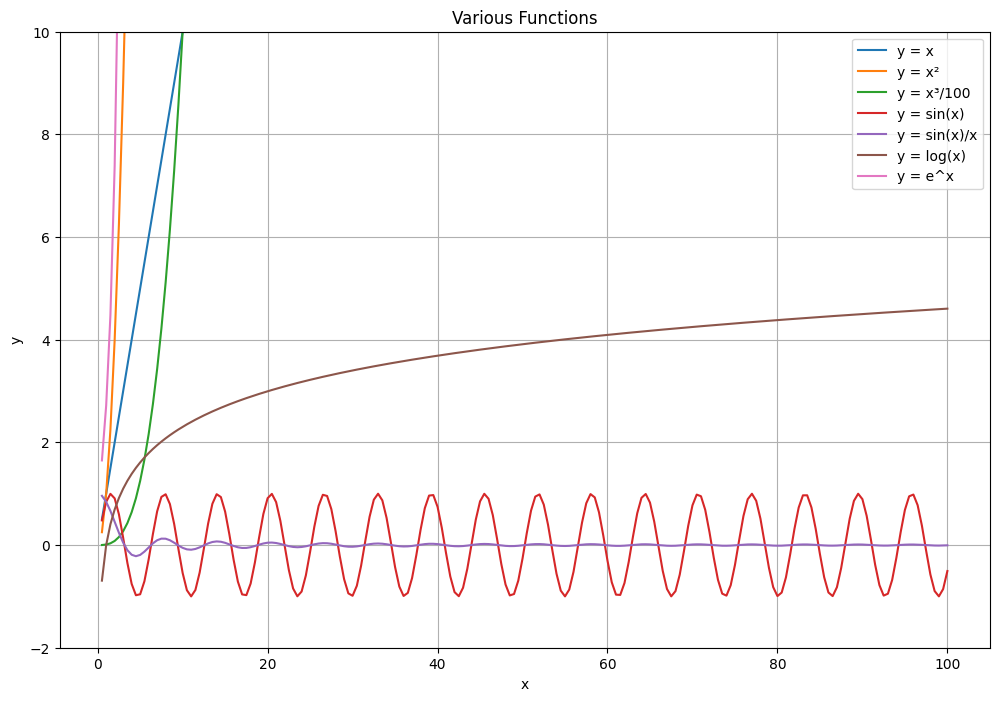

In [5]:
# Q9
import numpy as np
import matplotlib.pyplot as plt

# Defining the domain
x = np.arange(0.5, 100.5, 0.5)

# Defining the functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Creating the plot
plt.figure(figsize=(12, 8))

plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = x²')
plt.plot(x, y3, label='y = x³/100')
plt.plot(x, y4, label='y = sin(x)')
plt.plot(x, y5, label='y = sin(x)/x')
plt.plot(x, y6, label='y = log(x)')
plt.plot(x, y7, label='y = e^x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Various Functions')
plt.legend()
plt.grid(True)

# Setting y-axis limit to better view the functions
plt.ylim(-2, 10)

plt.show()